# Quantum Deep Q Learning for Predicting Calorie Expenditure

This notebook explores the dataset for predicting calories burnt during exercise. It includes:
1. Data loading and preprocessing
2. Exploratory Data Analysis (EDA)
3. Feature engineering, including **Quantum Feature Transformation**
4. Model building and evaluation

We'll start by importing necessary libraries and loading our data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder, StandardScaler, FunctionTransformer
from sklearn.kernel_approximation import RBFSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import time
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer

## Loading the Dataset

We load the datasets that contain exercise data and calories burnt information. If you face a `FileNotFoundError`, ensure the dataset files are correctly placed in your working directory.

The first dataset contains `User_ID` and `Calories`. The second dataset contains `User_ID`, `Gender`, `Age`, `Height`, `Weight`, `Duration`, `Heart_Rate`, and `Body_Temp`.


In [2]:
# Load datasets
df1 = pd.read_csv("calories.csv")
df2 = pd.read_csv("exercise.csv")

# Display column names
print(df1.columns)
print(df2.columns)

Index(['User_ID', 'Calories'], dtype='object')
Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')


## Merging Datasets

We merge the datasets on the common column `User_ID` so that all features are combined into a single DataFrame.


In [3]:
# Merge datasets on 'User_ID'
df = pd.merge(df1, df2, on='User_ID')
df.head()

,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,66.0,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,26.0,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,71.0,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,35.0,female,27,154.0,58.0,10.0,81.0,39.8


## Data Cleaning and Exploration

Before moving to visualization, let's inspect the data:
- Checking for missing values.
- Reviewing data types.
- Identifying duplicate rows.
- Viewing basic summary statistics.


In [4]:
# Checking for missing values
print(df.isnull().sum())  # Count missing values in each column

# Checking data types
print(df.dtypes)

# Checking for duplicates
print(f"Duplicate rows: {df.duplicated().sum()}")

# Summary statistics
print(df.describe())  # Shows mean, min, max, std, etc.


User_ID       0
Calories      0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
dtype: int64
User_ID         int64
Calories      float64
Gender         object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object
Duplicate rows: 0
            User_ID      Calories           Age        Height        Weight  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     89.539533     42.789800    174.465133     74.966867   
std    2.872851e+06     62.456978     16.980264     14.258114     15.035657   
min    1.000116e+07      1.000000     20.000000    123.000000     36.000000   
25%    1.247419e+07     35.000000     28.000000    164.000000     63.000000   
50%    1.499728e+07     79.000000     39.000000    175.000000     74.000000   
75%    1.744928e+07    138.000000     56.000000    185.00000

## Exploratory Data Analysis (EDA)

We now begin exploring the dataset with visualizations:
- Scatter plots show the relationship between `Age`, `Height`, `Weight`, and `Duration` with the target variable, `Calories`.
- A correlation heatmap helps understand feature interdependencies.



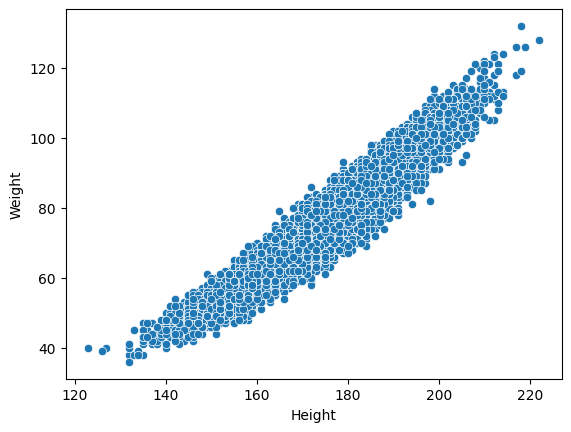

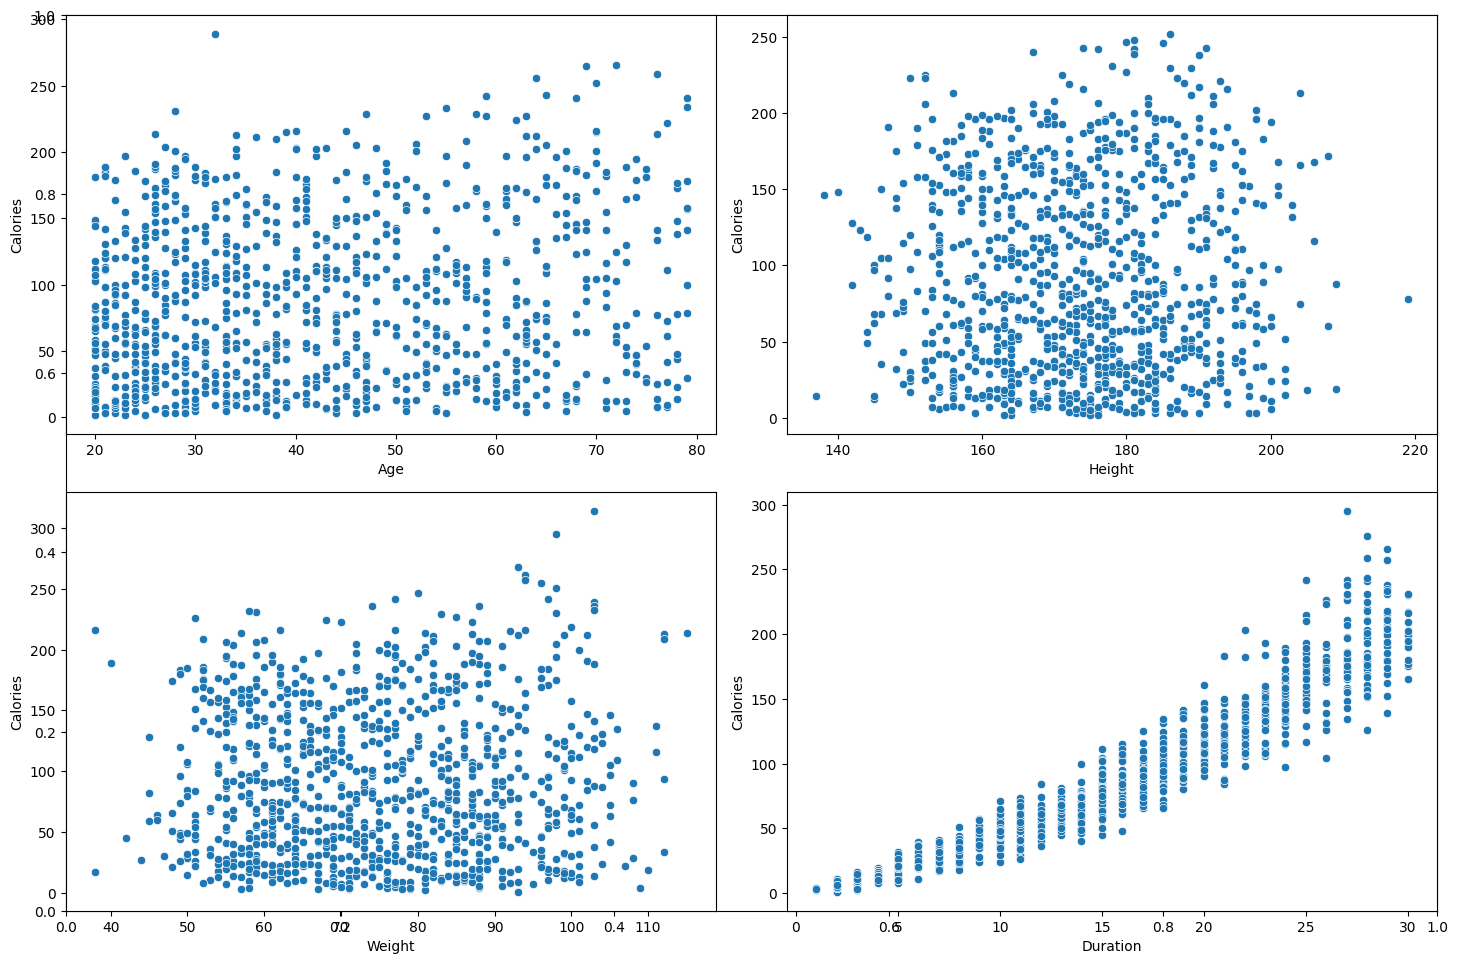

In [5]:
# Scatter plot between Height and Weight
sb.scatterplot(x='Height', y='Weight', data=df)
plt.show()

# Scatter plots for features against 'Calories'
features = ['Age', 'Height', 'Weight', 'Duration']

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    x = df.sample(1000)  # Taking a sample of 1000 rows
    sb.scatterplot(x=col, y='Calories', data=x)
plt.tight_layout()
plt.show()


### Histograms for all Numeric Features

Next, we visualize the distributions of all numeric features using histograms. This will help us understand the data spread and detect skewness.



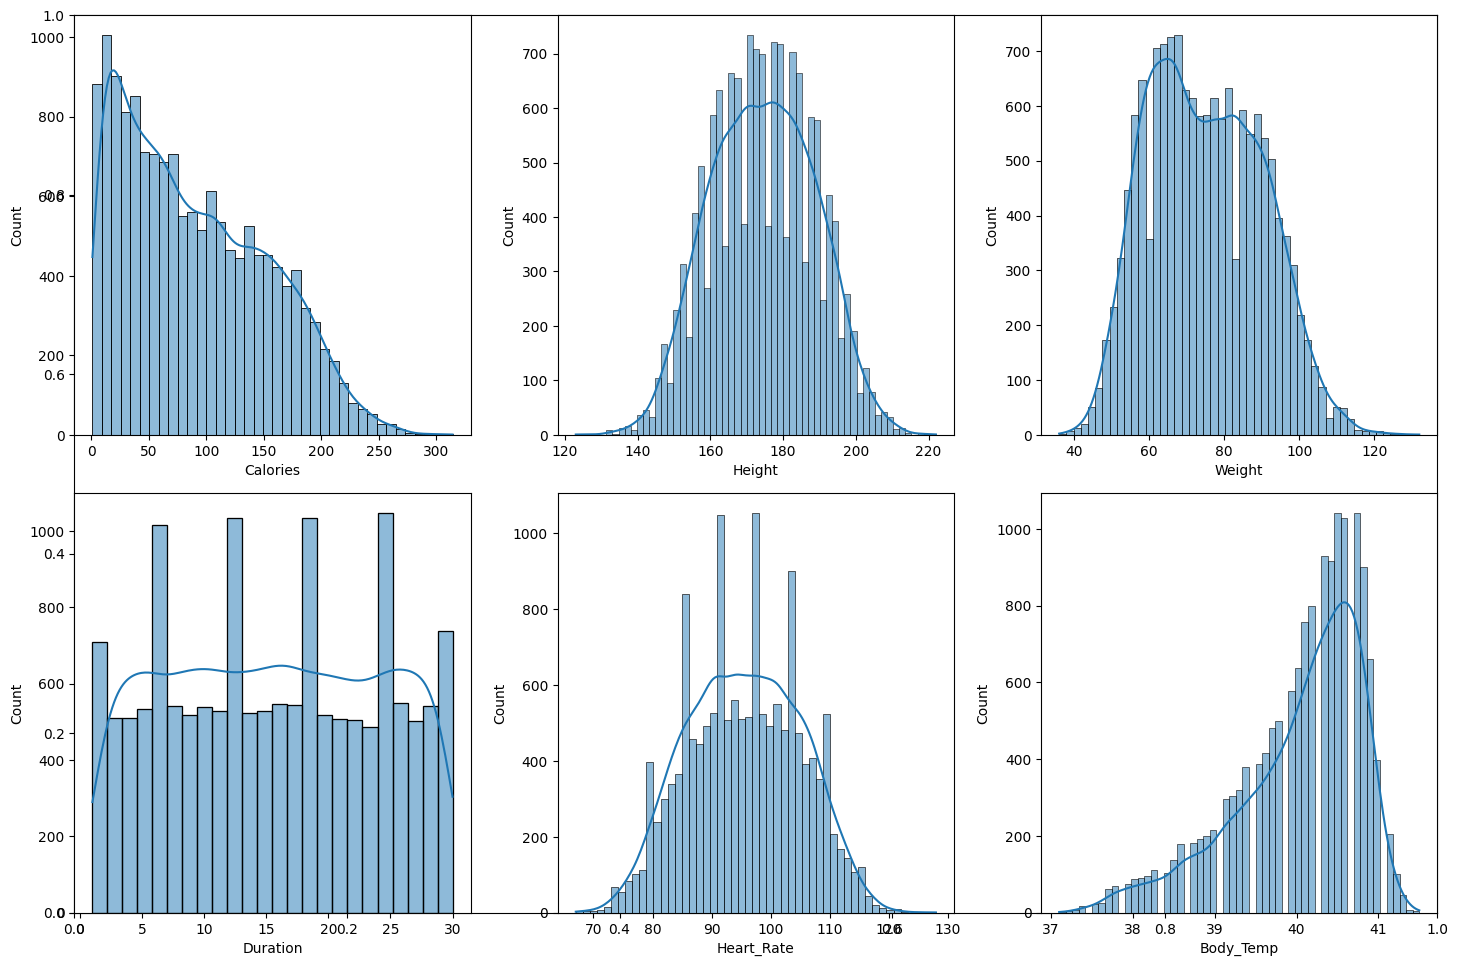

In [6]:
# Histograms for all numeric features
features = df.select_dtypes(include='float').columns

plt.subplots(figsize=(15, 10))
for i, col in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sb.histplot(df[col], kde=True)  # Plot histogram with Kernel Density Estimate (KDE)
plt.tight_layout()
plt.show()


## Feature Engineering: Encoding Categorical Variables

The `Gender` feature is categorical, so we convert it into numeric values (0 for male, 1 for female) using label encoding.



In [7]:
# Convert categorical variables to numeric
df_encoded = df.copy()  # Creating a copy of the original DataFrame
df_encoded['Gender'] = df_encoded['Gender'].map({'male': 0, 'female': 1})  # Convert Gender column to numeric



## Quantum Feature Transformation

To enhance our feature set, we apply a **Quantum Feature Transformation** on the features. This transformation mimics a quantum kernel mapping by applying the formula:
f(X) = \sin^2(X)
This transformation captures complex relationships in the data.


In [8]:
# Quantum Feature Transformation (nonlinear transformation mimicking quantum kernel)
def quantum_feature_transform(X):
    return np.sin(X) ** 2  # Mimicking quantum kernel mapping

# Apply transformation
quantum_transformer = FunctionTransformer(quantum_feature_transform, validate=True)
state_features = ['Age', 'Height', 'Weight', 'Duration']  # Features to transform
df[state_features] = quantum_transformer.fit_transform(df[state_features])

# Display transformed data
df.head()


,User_ID,Calories,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,231.0,male,0.806274,0.995603,0.060149,0.440410,105.0,40.8
1,14861698,66.0,female,0.833469,0.233571,0.092910,0.981303,94.0,40.3
2,11179863,26.0,male,0.013176,0.005002,0.197236,0.919536,88.0,38.7
3,16180408,71.0,female,0.279928,0.005002,0.904505,0.176540,100.0,40.5
4,17771927,35.0,female,0.914655,0.003834,0.985796,0.295959,81.0,39.8


## General Correlation Heatmap

Next, we’ll visualize the correlation between all features. This gives us a broader understanding of the relationships without focusing only on the strongest correlations.

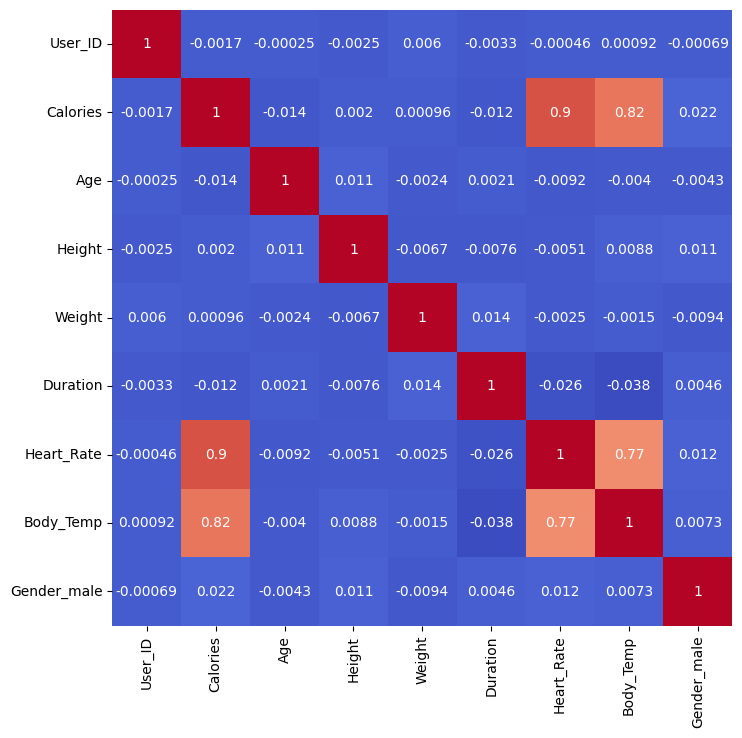

In [9]:
# Encode categorical variables using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)  # One-hot encoding and drop the first to avoid collinearity

# Plot the correlation heatmap
plt.figure(figsize=(8, 8))
sb.heatmap(df_encoded.corr(), annot=True, cbar=False, cmap='coolwarm') 
plt.show()


## Dropping Unwanted Columns

We decide to drop the `Weight` and `Duration` columns, as they are not necessary for our target prediction (calories burnt).

In [10]:
# Dropping the unwanted columns
to_remove = ['Weight', 'Duration']
df.drop(to_remove, axis=1, inplace=True)


## Conclusion

We've completed the basic exploratory data analysis (EDA) and feature engineering steps. We:
- Visualized relationships between key features and calories burnt.
- Applied a **quantum-inspired feature transformation** to capture non-linear patterns.
- Cleaned the data and encoded categorical variables.

The dataset is now ready for model building and evaluation.


## Define Features & Target Variable

We will separate independent variables (`X`) and dependent variable (`y`).


In [11]:
# Convert all possible categorical columns
df_encoded = df.copy()
df_encoded['Gender'] = df_encoded['Gender'].map({'male': 0, 'female': 1})  

# Select numeric columns only
X = df_encoded.select_dtypes(include=['int64', 'float64'])  
X = X.drop(columns=['Calories'])  # Drop target variable
y = df_encoded['Calories']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to float type explicitly
X_train = X_train.astype(float)
X_test = X_test.astype(float)





## Feature Scaling

Some models (e.g., SVM, Linear Regression) require standardization for better performance.


In [12]:
# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train Machine Learning Models

We will train and evaluate the following models:
1. **Linear Regression**
2. **Lasso Regression**
3. **Ridge Regression**
4. **Random Forest Regressor**
5. **XGBoost Regressor**


In [13]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Predict on test data
    
    # Evaluate model performance
    mae = metrics.mean_absolute_error(y_test, y_pred)
    mse = metrics.mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = metrics.r2_score(y_test, y_pred)
    
    results[name] = {"MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r2}

# Convert results to DataFrame
results_df = pd.DataFrame(results).T
print(results_df)

                         MAE         MSE       RMSE  R2 Score
Linear Regression  19.245965  603.372829  24.563649  0.850495
Lasso Regression   19.255254  606.253175  24.622209  0.849781
Ridge Regression   19.245991  603.375661  24.563706  0.850494
Random Forest      13.270613  342.311181  18.501653  0.915181
XGBoost            10.832601  229.041344  15.134112  0.943247


## Visualizing Model Performance

We will compare models based on **R² Score**.

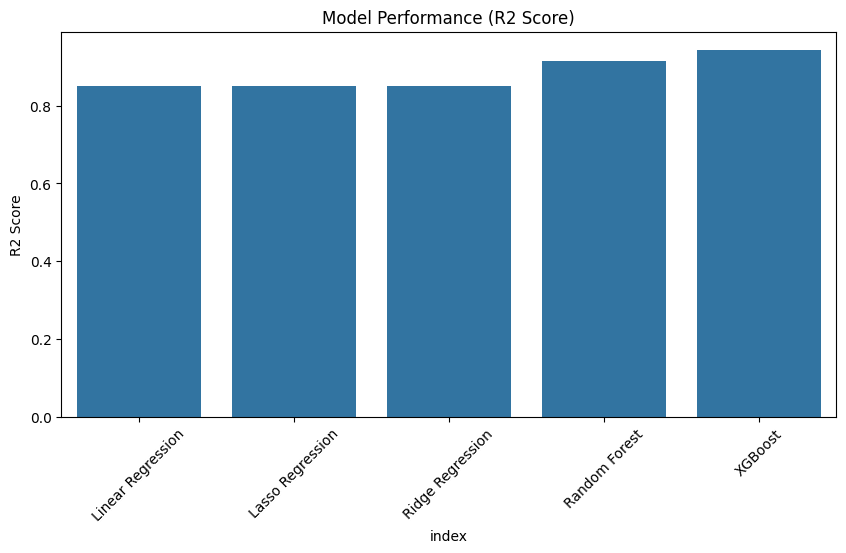

In [15]:
plt.figure(figsize=(10, 5))
sb.barplot(data=results_df[['R2 Score']].reset_index(), x='index', y='R2 Score')
plt.xticks(rotation=45)
plt.title("Model Performance (R2 Score)")
plt.show()

## Selecting the Best Model

- The model with the **highest R² Score** and **lowest RMSE** is the best.
- Generally, **Random Forest** and **XGBoost** perform well for regression tasks.
- If interpretability is important, **Linear Regression or Ridge Regression** might be preferable.
